# Astro 361 Galaxy Rotation Curve Lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [2]:
data_folder = '/Users/johntm/Desktop/lsa-ast361/Work/johntm/lab8/radio-astronomy-2/galaxyData/'

cal_files = glob.glob(data_folder + "calib*") #This command grabs all of the files starting with "calib" in your data folder.
cal_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command

In [3]:
gal_files = glob.glob(data_folder + "gal*") #This command grabs all of the files starting with "gal" in your data folder.
gal_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command

In [4]:
gal_spectra = [] # Create an empty array to later hold each of the spectra from the galaxy scans

for gal_file in gal_files: #Pull each individual filename from the list of galaxy files
    
    with open(gal_file) as gal_data: #This opens up the file and puts each line into a list called gal_data
        
        spectrum_rows_gal = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gal_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows_gal.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum_gal = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows_gal: 
            temp_spec_gal = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec_gal = [] # Create an empty list to hold the spectral data
            for val in temp_spec_gal: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec_gal.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum_gal = tot_spectrum_gal + np.float64(spec_gal) # Add the data from the current row to your total spectral data for this file.
        avg_spectrum_gal = tot_spectrum_gal/len(spectrum_rows_gal)
            
        gal_spectra.append(avg_spectrum_gal)

In [5]:
cal_spectra = [] # Create an empty array to later hold each of the spectra from the galaxy scans

for cal_file in cal_files: #Pull each individual filename from the list of galaxy files
    
    with open(cal_file) as cal_data: #This opens up the file and puts each line into a list called gal_data
        
        spectrum_rows_cal = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(cal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gal_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows_cal.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum_cal = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows_cal: 
            temp_spec_cal = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec_cal = [] # Create an empty list to hold the spectral data
            for val in temp_spec_cal: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec_cal.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum_cal = tot_spectrum_cal + np.float64(spec_cal) # Add the data from the current row to your total spectral data for this file.
        avg_spectrum_cal = tot_spectrum_cal/len(spectrum_rows_cal)
            
        cal_spectra.append(avg_spectrum_cal)

In [6]:
gal_corrected_0 = gal_spectra[0] - cal_spectra[0]
gal_corrected_1 = gal_spectra[1] - cal_spectra[0]
gal_corrected_2 = gal_spectra[2] - cal_spectra[0]
gal_corrected_3 = gal_spectra[3] - cal_spectra[0]
gal_corrected_4 = gal_spectra[4] - cal_spectra[0]
gal_corrected_5 = gal_spectra[5] - cal_spectra[0]
gal_corrected_6 = gal_spectra[6] - cal_spectra[0]
gal_corrected_7 = gal_spectra[7] - cal_spectra[0]
gal_corrected_8 = gal_spectra[8] - cal_spectra[0]
gal_corrected_9 = gal_spectra[9] - cal_spectra[0]

In [7]:
freq_min = 1416
freq_max = 1426
step = 0.009766
freq = np.arange(freq_min, freq_max, step)

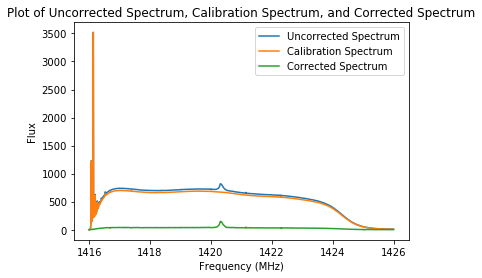

In [8]:
plt.plot(freq, gal_spectra[0], label='Uncorrected Spectrum')
plt.plot(freq, cal_spectra[0], label='Calibration Spectrum')
plt.plot(freq, gal_corrected_0, label='Corrected Spectrum')
plt.title('Plot of Uncorrected Spectrum, Calibration Spectrum, and Corrected Spectrum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')
plt.legend(loc='best')
plt.show()

In [9]:
freq_21cm_line_MHz = (29979245800/21.10611405413)/1e6

In [10]:
print(freq_21cm_line_MHz)

1420.4057517700055


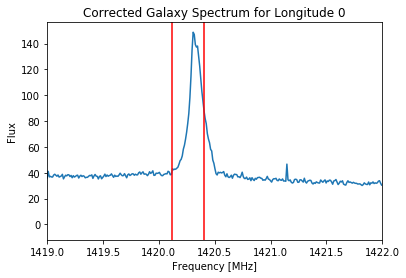

In [11]:
plt.plot(freq, gal_corrected_0)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.12, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 0')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

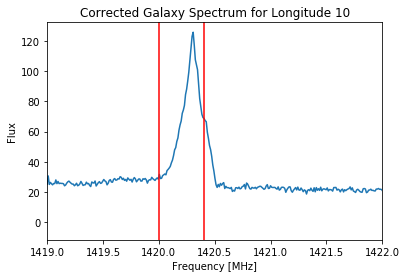

In [12]:
plt.plot(freq, gal_corrected_1)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.0, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 10')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

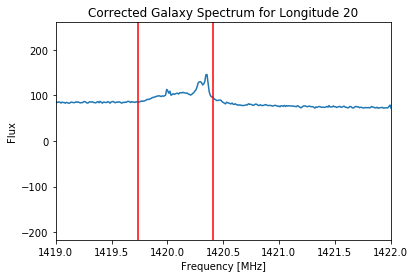

In [13]:
plt.plot(freq, gal_corrected_2)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1419.74, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 20')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

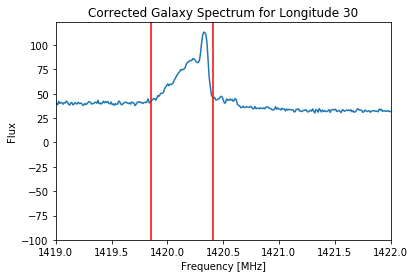

In [14]:
plt.plot(freq, gal_corrected_3)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1419.85, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 30')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

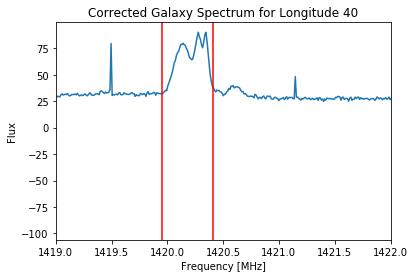

In [15]:
plt.plot(freq, gal_corrected_4)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1419.95, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 40')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

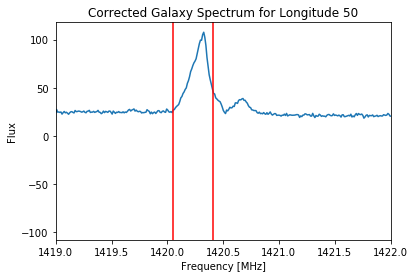

In [16]:
plt.plot(freq, gal_corrected_5)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.05, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 50')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

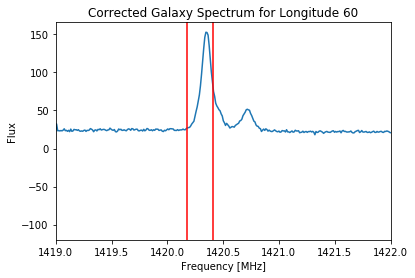

In [17]:
plt.plot(freq, gal_corrected_6)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.18, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 60')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

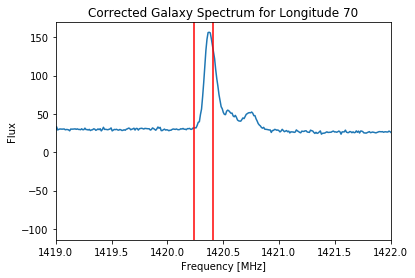

In [18]:
plt.plot(freq, gal_corrected_7)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.24, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 70')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

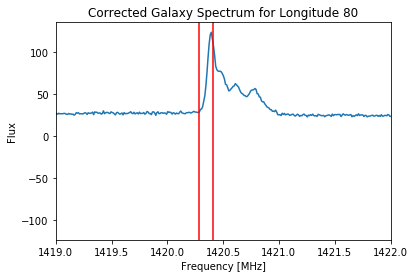

In [19]:
plt.plot(freq, gal_corrected_8)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.28, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 80')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

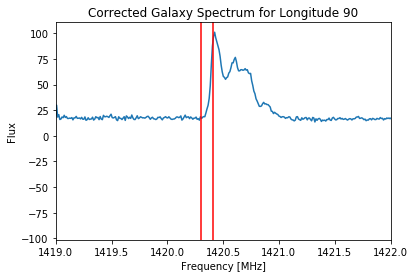

In [20]:
plt.plot(freq, gal_corrected_9)
plt.axvline(freq_21cm_line_MHz, color='r')
plt.axvline(1420.3, color='r')
plt.xlim(left=1419)
plt.xlim(right=1422)
plt.title('Corrected Galaxy Spectrum for Longitude 90')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.show()

In [21]:
delta_freq_MHz = [freq_21cm_line_MHz-1420.12, freq_21cm_line_MHz-1420.0, freq_21cm_line_MHz-1419.74, 
                  freq_21cm_line_MHz-1419.85, freq_21cm_line_MHz-1419.95, freq_21cm_line_MHz-1420.05, 
                  freq_21cm_line_MHz-1420.18, freq_21cm_line_MHz-1420.24, freq_21cm_line_MHz-1420.28,
                  freq_21cm_line_MHz-1420.3]

In [22]:
print(delta_freq_MHz)

[0.2857517700056178, 0.40575177000550866, 0.6657517700054996, 0.5557517700055996, 0.4557517700054632, 0.35575177000555414, 0.225751770005445, 0.16575177000549957, 0.12575177000553595, 0.10575177000555414]


In [23]:
delta_freq_div_rest_freq = [delta_freq_MHz[0]/freq_21cm_line_MHz, delta_freq_MHz[1]/freq_21cm_line_MHz,
                            delta_freq_MHz[2]/freq_21cm_line_MHz, delta_freq_MHz[3]/freq_21cm_line_MHz,
                            delta_freq_MHz[4]/freq_21cm_line_MHz, delta_freq_MHz[5]/freq_21cm_line_MHz,
                            delta_freq_MHz[6]/freq_21cm_line_MHz, delta_freq_MHz[7]/freq_21cm_line_MHz,
                            delta_freq_MHz[8]/freq_21cm_line_MHz, delta_freq_MHz[9]/freq_21cm_line_MHz]

In [24]:
print(delta_freq_div_rest_freq)

[0.00020117615663660534, 0.000285659058687907, 0.0004687053464658873, 0.00039126268625219415, 0.00032086026787594936, 0.00025045784949986465, 0.00015893470561079444, 0.00011669325458514362, 8.853228723470973e-05, 7.44518035594928e-05]


In [25]:
speed_of_light_km = 299792.458
v_redshift = [delta_freq_div_rest_freq[0]*speed_of_light_km, delta_freq_div_rest_freq[1]*speed_of_light_km,
              delta_freq_div_rest_freq[2]*speed_of_light_km, delta_freq_div_rest_freq[3]*speed_of_light_km,
              delta_freq_div_rest_freq[4]*speed_of_light_km, delta_freq_div_rest_freq[5]*speed_of_light_km,
              delta_freq_div_rest_freq[6]*speed_of_light_km, delta_freq_div_rest_freq[7]*speed_of_light_km,
              delta_freq_div_rest_freq[8]*speed_of_light_km, delta_freq_div_rest_freq[9]*speed_of_light_km]

In [26]:
print(v_redshift)

[60.31109448908092, 85.63843135401389, 140.51432789474995, 117.29760243522809, 96.19148838106929, 75.08537432695849, 47.64742605656645, 34.98375762409997, 26.54131200245565, 22.320089191633496]


In [27]:
v_plus_vlsr = [v_redshift[0] + 10.48, v_redshift[1] + 9.86, v_redshift[2] + 8.96, v_redshift[3] + 7.77,
               v_redshift[4] + 6.33, v_redshift[5] + 4.70, v_redshift[6] + 2.93, v_redshift[7] + 1.07,
               v_redshift[8] - 0.82, v_redshift[9] - 2.68]

In [28]:
print(v_plus_vlsr)

[70.79109448908092, 95.49843135401389, 149.47432789474996, 125.06760243522808, 102.52148838106929, 79.78537432695849, 50.57742605656645, 36.05375762409997, 25.72131200245565, 19.640089191633496]


In [29]:
v_plus_sun_motion = [v_plus_vlsr[0] + (220*np.sin(0)), v_plus_vlsr[1] + (220*np.sin((10*np.pi)/180)),
                     v_plus_vlsr[2] + (220*np.sin((20*np.pi)/180)), v_plus_vlsr[3] + (220*np.sin((30*np.pi)/180)),
                     v_plus_vlsr[4] + (220*np.sin((40*np.pi)/180)), v_plus_vlsr[5] + (220*np.sin((50*np.pi)/180)),
                     v_plus_vlsr[6] + (220*np.sin((60*np.pi)/180)), v_plus_vlsr[7] + (220*np.sin((70*np.pi)/180)),
                     v_plus_vlsr[8] + (220*np.sin((80*np.pi)/180)), v_plus_vlsr[9] + (220*np.sin((90*np.pi)/180))]

In [30]:
print(v_plus_sun_motion)

[70.791094489080919, 133.70103044073858, 224.71875942639707, 235.06760243522808, 243.93476251210791, 248.31515181313364, 241.10301488914294, 242.7861341969998, 242.37901766514142, 239.64008919163351]


In [31]:
len(v_plus_sun_motion)

10

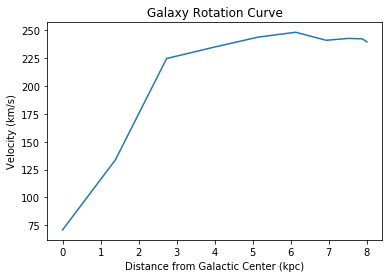

[0.0, 1.3891854213354426, 2.7361611466053497, 3.9999999999999996, 5.142300877492314, 6.1283555449518241, 6.9282032302755088, 7.5175409662872665, 7.8784620240976642, 8.0]


In [32]:
R = [8*(np.sin(0)), 8*(np.sin((10*np.pi)/180)), 8*(np.sin((20*np.pi)/180)), 8*(np.sin((30*np.pi)/180)),
     8*(np.sin((40*np.pi)/180)), 8*(np.sin((50*np.pi)/180)), 8*(np.sin((60*np.pi)/180)), 
     8*(np.sin((70*np.pi)/180)), 8*(np.sin((80*np.pi)/180)), 8*(np.sin((90*np.pi)/180))]
plt.plot(R, v_plus_sun_motion)
plt.title('Galaxy Rotation Curve')
plt.xlabel('Distance from Galactic Center (kpc)')
plt.ylabel('Velocity (km/s)')
plt.show()
print(R)

In [35]:
v_err = speed_of_light_km*(0.1/freq_21cm_line_MHz)
print(v_err)

21.10611405413


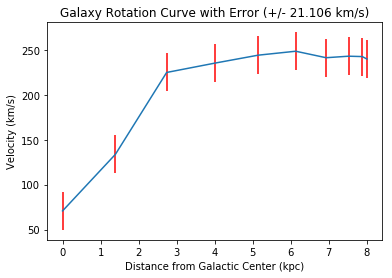

In [46]:
plt.errorbar(R, v_plus_sun_motion, xerr=0, yerr=v_err, ecolor='r')
plt.title('Galaxy Rotation Curve with Error (+/- 21.106 km/s)')
plt.xlabel('Distance from Galactic Center (kpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

In [47]:
print(R)

[0.0, 1.3891854213354426, 2.7361611466053497, 3.9999999999999996, 5.142300877492314, 6.1283555449518241, 6.9282032302755088, 7.5175409662872665, 7.8784620240976642, 8.0]
